# Planeación de corredores verdes para líneas de transmisión usando optimización multicriterio.

En la etapa de planeación de una línea de transmisión, encontrar la ruta óptima es un problema complejo que involucra aspectos ambientales, geográficos, geológicos, sociales, económicos, de transporte y de distancias, entre otros. No significa que únicamente se deba encontrar la ruta más corta, o la ruta que provea más capacidad de transmisión, o la ruta más económica, es más bien encontrar un compromiso óptimo de múltiples aspectos. Muchos criterios considerados en la planeación del corredor de una línea de transmisión pueden ser correlacionados geográficamente, tales como: capacidad, peso, costos de servidumbre, accesos y rutas existentes, cimentación, niveles de corrosión, recursos hídricos y características de terreno, entre otros. Es decir, los indicadores de los diferentes criterios cambian de acuerdo a una ubicación georreferenciada en un mapa. Cada uno de estos criterios puede generar un mapa de calor, cuyo indicador es el costo geográfico según una escala de nivel definida. De esta manera, se pueden tener n mapas de costos, asociados a n criterios de interés. Los mapas se pueden fusionar para generar una superficie de costos integrada (SCI)

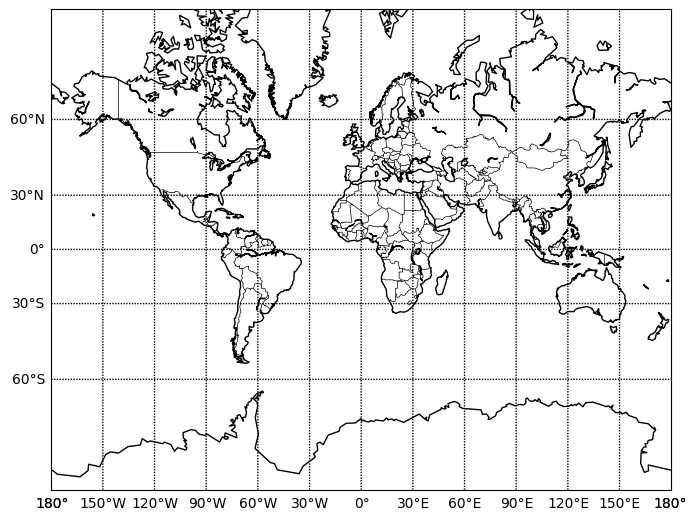

In [42]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Crear una figura y un objeto de ejes
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

# Crear un objeto Basemap y definir la proyección y los límites del mapa
m = Basemap(projection='merc', llcrnrlon=-180, llcrnrlat=-80, urcrnrlon=180, urcrnrlat=80, resolution='c')

# Dibujar la costa y las fronteras del país
m.drawcoastlines()
m.drawcountries()

# Dibujar meridianos y paralelos
m.drawmeridians(range(-180, 180, 30), labels=[False,True,False,True])
m.drawparallels(range(-90, 90, 30), labels=[True,False,False,True])

# Mostrar el mapa
plt.show()



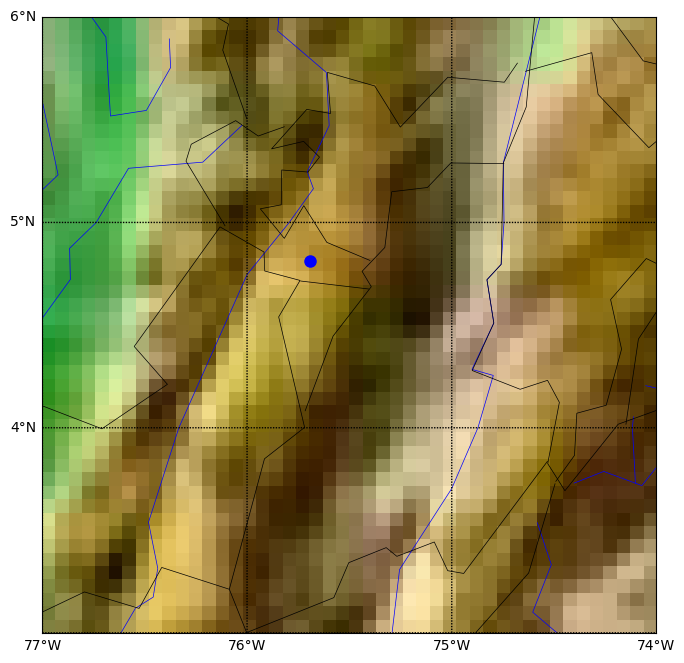

In [64]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

# Crear una figura y un objeto de ejes
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

# Crear un objeto Basemap y definir la proyección y los límites del mapa
m = Basemap(llcrnrlon=-77, llcrnrlat=3, urcrnrlon=-74, urcrnrlat=6, projection='merc', resolution='l')

# Dibujar la costa y las fronteras del país
m.drawcoastlines()
m.drawcountries()
m.drawrivers( color='blue')
m.drawstates()
# Dibujar meridianos y paralelos
m.drawmeridians(range(-77, -73, 1), labels=[0, 0, 0, 1])
m.drawparallels(range(3, 7, 1), labels=[1, 0, 0, 0])

# Agregar un marcador para Pereira
pereira_lat = 4.8143
pereira_lon = -75.6944
x, y = m(pereira_lon, pereira_lat)
m.plot(x, y, 'bo', markersize=8)
m.etopo()

# Dibujar los límites administrativos de Pereira


# Mostrar el mapa
plt.show()


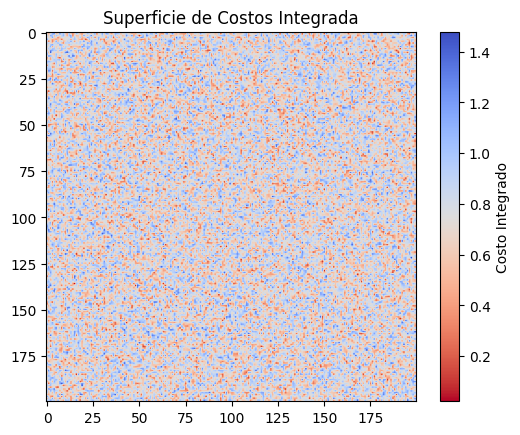

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generación de datos simulados
filas, columnas = 200, 200
array_ambiental = np.random.rand(filas, columnas)
array_social = np.random.rand(filas, columnas)
array_economico = np.random.rand(filas, columnas)

# Normalización de los datos
array_ambiental_norm = array_ambiental / array_ambiental.max()
array_social_norm = array_social / array_social.max()
array_economico_norm = array_economico / array_economico.max()

# Asignación de pesos
peso_ambiental = 0.5
peso_social = 0.5
peso_economico = 0.5

# Cálculo de la superficie de costos integrada
superficie_costos = (
    array_ambiental_norm * peso_ambiental +
    array_social_norm * peso_social +
    array_economico_norm * peso_economico
)

# Visualización de la superficie de costos integrada
plt.imshow(superficie_costos, cmap='coolwarm_r')
plt.colorbar(label='Costo Integrado')
plt.title('Superficie de Costos Integrada')
plt.show()




In [2]:
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Carga los datos en formato raster (GeoTIFF)
raster_ambiental = rasterio.open('ruta/del/archivo_ambiental.tif')
raster_social = rasterio.open('ruta/del/archivo_social.tif')
raster_economico = rasterio.open('ruta/del/archivo_economico.tif')

# Lee las bandas de datos como arrays de numpy
array_ambiental = raster_ambiental.read(1)
array_social = raster_social.read(1)
array_economico = raster_economico.read(1)

# Normalización de los datos
array_ambiental_norm = array_ambiental / array_ambiental.max()
array_social_norm = array_social / array_social.max()
array_economico_norm = array_economico / array_economico.max()

# Asignación de pesos
peso_ambiental = 0.4
peso_social = 0.3
peso_economico = 0.3

# Cálculo de la superficie de costos integrada
superficie_costos = (
    array_ambiental_norm * peso_ambiental +
    array_social_norm * peso_social +
    array_economico_norm * peso_economico
)

# Visualización de la superficie de costos integrada
plt.imshow(superficie_costos, cmap='coolwarm_r')
plt.colorbar(label='Costo Integrado')
plt.title('Superficie de Costos Integrada')
plt.show()



RasterioIOError: ruta/del/archivo_ambiental.tif: No such file or directory